In [1]:
# Copyright (C) 2022 Intel Corporationworkbench.action.openLargeOutput
#
# SPDX-License-Identifier: MIT

import os
import datumaro as dm
import time

from datumaro.components.searcher import Searcher
from datumaro.components.visualizer import Visualizer

#### device:  cuda


In [2]:
start_time = time.time()
# dataset = dm.Dataset.import_from('./tests/assets/coco_dataset/coco', save_hash=True)
# dataset = dm.Dataset.import_from("coco_dataset", format='coco_instances', save_hash=True)
dataset = dm.Dataset.import_from("/media/hdd1/Datasets/imagenet/val", format='imagenet', save_hash=True)
print(f'setting dataset time for {len(dataset)} items: ', time.time()-start_time)

50000it [09:10, 90.86it/s] 


setting dataset time for 50000 items:  550.6038653850555


In [3]:
print("Subset candidates: ", dataset.subsets().keys())
subset = list(dataset.subsets().keys())
print("Subset: ", subset)

Subset candidates:  dict_keys(['default'])
Subset:  ['default']


In [4]:
def get_ids(dataset: dm.Dataset):
    ids = []
    for item in dataset:
            ids += [item.id]
    return ids

In [5]:
ids = get_ids(dataset)

In [14]:
for i, item in enumerate(dataset):
    if i==52:
        query = item
print(query)

DatasetItem(id='n01877812/ILSVRC2012_val_00001036', subset='default', media=<datumaro.components.media.Image object at 0x7f9bec179e10>, annotations=[Label(id=0, attributes={}, group=0, label=104)], attributes={}, hash_key=['a7e1426add6be26c6dc070b59cd087d12c1ac41f3158423acdfed935dde6794f79faef4c5abdff85c22880089bdb39c3c86c14ac82fd5c85a4a54a22b702b6b9'])


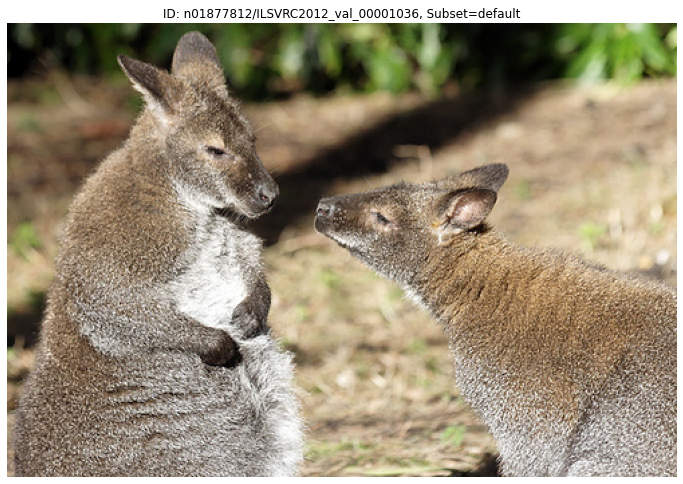

In [7]:
visualizer = Visualizer(dataset, figsize=(12, 12), alpha=0)
fig = visualizer.vis_one_sample(query.id, "default")
fig.show()

In [8]:
searcher = Searcher(dataset)

In [9]:
topk_list = searcher.search_topk(query, topk=15)

In [10]:
results = [query] + topk_list[1:]

In [11]:
subset_list = []
id_list =[]
for result in results:
    subset_list.append(result.subset)
    id_list.append(result.id)

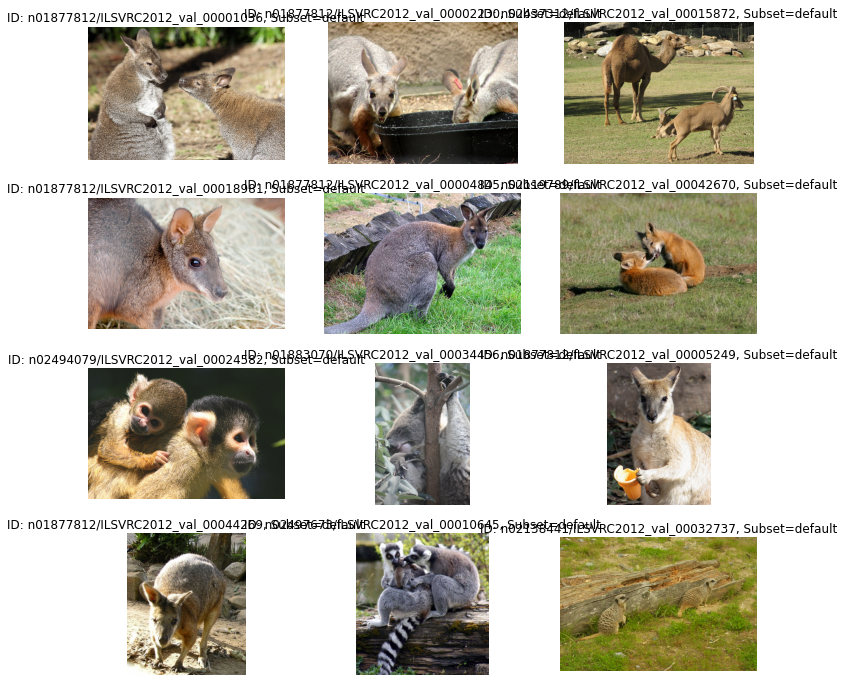

In [12]:
fig = visualizer.vis_gallery(id_list[:12], subset_list[:12], (None, None))
fig.show()